### Colab 에서 pyTorch 를 사용하기 위해 설치하는 과정입니다.

In [2]:
# import os
# from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
# platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
# accelerator = 'cu80' if os.path.exists('/opt/bin/nvidia-smi') else 'cpu'
# !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision

tcmalloc: large alloc 1073750016 bytes == 0x5c840000 @  0x7f8b575221c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8


### pyTorch 를 비롯해 오늘 실습에 필요한 파이썬 라이브러리를 읽어들입니다.

In [0]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision # 이미지 관련 처리, Pretrained Model 관련된 Package 입니다. 
import torchvision.datasets as vision_dsets
import torchvision.transforms as T # 이미지 처리 (Vison) 관련된 transformation이 정의 되어 있습니다.
import torch.optim as optim # pytorch 에서 정의한 수 많은 optimization function 들이 들어 있습니다.
from torch.utils import data

import numpy as np
import matplotlib.pyplot as plt # 시각화를 위한 패키지입니다.

# MNIST Feed-Forward Neural Network for a classification

## Data Loader 불러오기

In [0]:
def MNIST_DATA(root='data/mnist', train=True, transforms=None, download =True,batch_size=32, num_worker=1):

	mnist_train = vision_dsets.MNIST(root = root,  #root 는 데이터의 저장 위치 입니다. 
									train = True, #Train 은 이 데이터가 train 데이터인지 아닌지에 대한 정보입니다. 
									transform = T.ToTensor(), # 얻어낸 데이터를 pytorch가 계산 할 수 있는 Tensor 로 변환해 줍니다. 
									download = True)  # 데이터를 다운로드 할지 여부를 물어봅니다. 
	mnist_test = vision_dsets.MNIST(root = root,
									train = False,  # Test Data를 가져오기에 Train =False 를 줘야 합니다. 
									transform = T.ToTensor(),
									download = True)
	"""
  	Data Loader 는 데이터와 batch size의 정보를 바탕으로 매 iteration 마다 주어진 데이터를 원하는 batch size 만큼 반환해주는 iterator입니다. 
  	* Practical Guide : Batch size 는 어느정도가 좋나요? -- 클 수록 좋다는 소리가 있습니다. 하지만 gpu memeory 사이즈 한계에 의해 기본적으로 batch size 가 
  	커질 수록 학습에 사용되는 gpu memory 사이즈가 큽니다. (Activation map을 저장해야 하기 때문입니다.) 기본적으로 2의 배수로 저장하는 것이 좋습니다.(Bit size 관련) 
  
	"""
	trainDataLoader = data.DataLoader(dataset = mnist_train,  # DataSet은 어떤 Data를 제공해 줄지에 대한 정보입니다. 여기서는 Training DATA를 제공합니다. 
									batch_size = batch_size, # batch size 정보를 꼭 줘야 합니다. 한 Batch 당 몇 개의 Data 를 제공할지에 대한 정보입니다. 
									shuffle = True, # Training의 경우 Shuffling 을 해주는 것이 성능에 지대한 영향을 끼칩니다. 꼭 True 를 줘야 합니다. epoch 마다 index의 순서를 바까줌 
									num_workers = 1) # num worker의 경우 데이터를 로드하는데 worker를 얼마나 추가하겠는가에 대한 정보입니다. 

	testDataLoader = data.DataLoader(dataset = mnist_test, # Test Data Loader 이므로 Test Data를 인자로 전달해줍니다.
									batch_size = batch_size, # 마찬가지로 Batch size 를 넣어줍니다. 
									shuffle = False, # shuffling 이 굳이 필요하지 않으므로 false를 줍니다. 
									num_workers = 1) #
	print ("[+] Finished loading data & Preprocessing")
	return mnist_train,mnist_test,trainDataLoader,testDataLoader

In [5]:
trainDset,testDset,trainDataLoader,testDataLoader= MNIST_DATA(batch_size = 32)  # Data Loader 를 불러 옵니다. 
print('[info] # of train batch : ', len(trainDataLoader)) # 60000개 이미지
print('[info] # of test batch : ', len(testDataLoader)) # 10016개 이미지

device = 'cuda' if torch.cuda.is_available() else 'cpu' # pytorch0.4.0 이상 버젼에서 gpu 설정하는 방식, tensor.to(device) 이런식으로 사용

[+] Get the MNIST DATA
Processing...
Done!
[+] Finished loading data & Preprocessing
[info] # of train batch :  1875
[info] # of test batch :  313


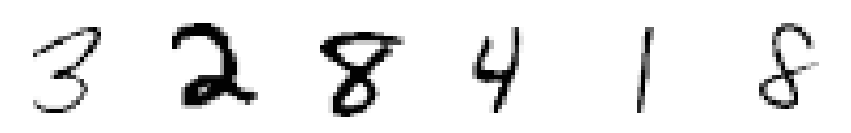

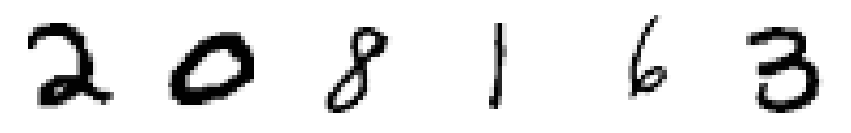

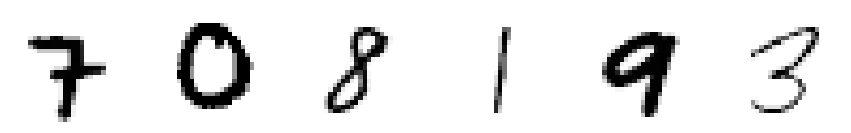

In [6]:
def showImages(image, row):
  
  for _ in range(row):  
  
    idx = np.random.choice(32, 6)     # 0 ~ 31 의 정수 중 6 개를 임의로 선택
    images =image.numpy()[idx]         # 선택된 index 에 해당하는 이미지를 가져옴
    
    plt.figure(figsize = (15, 90))     # 세로 길이 15, 가로 길이 15 * 6 의 화면 생성
    
    for i in range(161, 167):    
    
      plt.subplot(i)
      plt.imshow(images[i - 161])
      plt.xticks([])
      plt.yticks([])    
    
    plt.show()  

for i, (image, labels) in enumerate(trainDataLoader): 
  
  showImages(image.squeeze(), 3)
  break

## Train Function

In [0]:
def train_network(net,optimizer,trainloader):
  for epoch in range(5):  # loop over the dataset multiple times

      running_loss = 0.0 # running loss를 저장하기 위한 변수입니다. 
      for i, data in enumerate(trainloader): # 한 Epoch 만큼 돕니다. 매 iteration 마다 정해진 Batch size 만큼 데이터를 뱉습니다. 
          # get the inputs
          inputs, labels = data # DataLoader iterator의 반환 값은 input_data 와 labels의 튜플 형식입니다. 
          inputs = inputs.to(device) # Pytorch에서 nn.Module 에 넣어 Backprop을 계산 하기 위해서는 gpu 연동을 이와 같이 해줘야 합니다.
          labels = labels.to(device)
          # zero the parameter gradients
          optimizer.zero_grad()    #  현재 기존의 backprop을 계산하기 위해서 저장했던 activation buffer 를 비웁니다. Q) 이걸 안 한다면?

          # forward + backward + optimize
          outputs = net(inputs) # input 을 넣은 위 network 로 부터 output 을 얻어냅니다. 
          loss = criterion(outputs, labels) # loss fucntion에 주어진 target과 output 의 score를 계산하여 반환합니다. 
          loss.backward() # * Scalar Loss value를 Backward() 해주게 되면 주어진 loss값을 바탕으로 backpropagation이 진행됩니다. 
          optimizer.step() # 계산된 Backprop 을 바탕으로 optimizer가 gradient descenting 을 수행합니다. 

          # print statistics
          running_loss += loss.data[0]
          if (i+1) % 500 == 0:    # print every 500 mini-batches
              print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 500))
              running_loss = 0.0

  print('Finished Training')

## Test Function

In [0]:
def test(model,test_loader):
  model.eval() # Eval Mode 왜 해야 할까요?  --> nn.Dropout BatchNorm 등의 Regularization 들이 test 모드로 들어가게 되기 때문입니다. 
  test_loss = 0
  correct = 0
  for data, target in test_loader:
    data = data.to(device)
    target = target.to(device)  # 기존의 train function의 data 처리부분과 같습니다.  
    output = model(data) 
    pred = output.max(1, keepdim=True)[1] # get the index of the max 
    correct += pred.eq(target.view_as(pred)).sum().data[0] # 정답 데이터의 갯수를 반환합니다. 

  test_loss /= len(test_loader.dataset)
  print('\nTest set:  Accuracy: {}/{} ({:.0f}%)\n'.format(
      correct, len(test_loader.dataset),
      100. * correct / len(test_loader.dataset)))

## Neural Network  + Activation Function

### 간단한 Neural Network 를 만들어 봅시다. (1)
특징 : 2개의 Layer를 가지는 Neural Network 
<구성>  
Layer 1 - input:28*28 , output : 30 + Activation Fucntion - Sigmoid 

Layer 2 - input: 30 output:10

Cross Entropy Loss  + SGD optimizer



In [0]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__() 
        # an affine operation: y = Wx + b
        self.fc0 = nn.Linear(28*28,30)
        self.fc1 = nn.Linear(30, 10)

    def forward(self, x):
        x = x.view(-1,28*28) # x.view함수는 주어진 인자의 크기로 해당 데이터의 크기를 반환합니다. 즉, (Batch_size,28,28) --> (Batch_size,28*28)로 변환합니다.
        x = F.sigmoid(self.fc0(x)) # 28*28 -> 30 -> Activation function 을 수행합니다.
        x = self.fc1(x)  # 30 -> 10 으로 10개의 Class에 대한 logit 값을 호출합니다. 
        return x

### Optimizer 
Optimizer 의 경우 기본적으로 torch.optim 안에 존재합니다. 다양한 optimziers 가 정의되어 있습니다. 

기본적으로 다음과 같은 구성을 따릅니다. optim.{Optimzier 이름}({Network Parameters},lr ={learning rate })

In [0]:
mnist_net = MNIST_Net().to(device) # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [15]:
train_network(mnist_net,optimizer,trainDataLoader) # 5 Epoch 정도 학습을 진행해봅니다. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,   500] loss: 2.332
[1,  1000] loss: 2.298
[1,  1500] loss: 2.277
[2,   500] loss: 2.253
[2,  1000] loss: 2.240
[2,  1500] loss: 2.227
[3,   500] loss: 2.204
[3,  1000] loss: 2.191
[3,  1500] loss: 2.176
[4,   500] loss: 2.149
[4,  1000] loss: 2.133
[4,  1500] loss: 2.117
[5,   500] loss: 2.081
[5,  1000] loss: 2.064
[5,  1500] loss: 2.045
Finished Training


In [16]:
test(mnist_net,testDataLoader) # Test 정확도를 출력해 봅니다. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.



Test set:  Accuracy: 6095/10000 (60%)



### 간단한 Neural Network 를 만들어 봅시다. (2)
특징 : 2개의 Layer를 가지는 Neural Network 
<구성>  
Layer 1 - input:28*28 , output : 30 + Activation Fucntion - tanh 

Layer 2 - input: 30 output:10

Cross Entropy Loss  + SGD optimizer 

In [0]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc0 = nn.Linear(28*28,30)
        self.fc1 = nn.Linear(30, 10)

    def forward(self, x):
        x = x.view(-1,28*28) # x.view함수는 주어진 인자의 크기로 해당 데이터의 크기를 반환합니다. 즉, (Batch_size,28,28) --> (Batch_size,28*28)로 변환합니다.
        x = F.tanh(self.fc0(x)) # 28*28 -> 30 -> Activation function 을 수행합니다.
        x = self.fc1(x)  # 30 -> 10 으로 10개의 Class에 대한 logit 값을 호출합니다. 
        return x

In [0]:
mnist_net = MNIST_Net().to(device) # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [19]:
train_network(mnist_net,optimizer,trainDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,   500] loss: 2.201
[1,  1000] loss: 2.024
[1,  1500] loss: 1.869
[2,   500] loss: 1.617
[2,  1000] loss: 1.497
[2,  1500] loss: 1.380
[3,   500] loss: 1.218
[3,  1000] loss: 1.144
[3,  1500] loss: 1.067
[4,   500] loss: 0.964
[4,  1000] loss: 0.923
[4,  1500] loss: 0.885
[5,   500] loss: 0.819
[5,  1000] loss: 0.781
[5,  1500] loss: 0.757
Finished Training


In [20]:
test(mnist_net,testDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.



Test set:  Accuracy: 8570/10000 (85%)



![대체 텍스트](https://taewanmerepo.github.io/2017/12/tanh/010.jpg)
![대체 텍스트](https://taewanmerepo.github.io/2017/12/tanh/020.jpg)

### 간단한 Neural Network 를 만들어 봅시다. (3)
특징 : 2개의 Layer를 가지는 Neural Network 
<구성>  
Layer 1 - input:28*28 , output : 30 + Activation Fucntion - Relu

Layer 2 - input: 30 output:10

Cross Entropy Loss  + SGD optimizer 


In [0]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc0 = nn.Linear(28*28,30)
        self.fc1 = nn.Linear(30, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        # If the size is a square you can only specify a single number
        x = x.view(-1,28*28)
        x = F.relu(self.fc0(x))
        x = self.fc1(x)
        return x

In [0]:
mnist_net = MNIST_Net().to(device) # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [0]:
train_network(mnist_net,optimizer,trainDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,   500] loss: 2.281
[1,  1000] loss: 2.199
[1,  1500] loss: 2.104
[2,   500] loss: 1.899
[2,  1000] loss: 1.758
[2,  1500] loss: 1.605
[3,   500] loss: 1.358
[3,  1000] loss: 1.224
[3,  1500] loss: 1.104
[4,   500] loss: 0.961
[4,  1000] loss: 0.884
[4,  1500] loss: 0.833
[5,   500] loss: 0.761
[5,  1000] loss: 0.713
[5,  1500] loss: 0.679
[6,   500] loss: 0.629
[6,  1000] loss: 0.617
[6,  1500] loss: 0.602
[7,   500] loss: 0.563
[7,  1000] loss: 0.544
[7,  1500] loss: 0.541
[8,   500] loss: 0.521
[8,  1000] loss: 0.500
[8,  1500] loss: 0.498
[9,   500] loss: 0.488
[9,  1000] loss: 0.468
[9,  1500] loss: 0.463
[10,   500] loss: 0.455
[10,  1000] loss: 0.449
[10,  1500] loss: 0.434
Finished Training


In [0]:
test(mnist_net,testDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.



Test set:  Accuracy: 8927/10000 (89%)



![대체 텍스트](https://cdn-images-1.medium.com/max/1600/1*g0yxlK8kEBw8uA1f82XQdA.png)

### 간단한 Neural Network 를 만들어 봅시다. (4) 
특징 : 3개의 Layer를 가지는 Neural Network 
<구성>  
Activation Fucntion - sigmoid 

Layer 1 - input:28*28 , output : 40

Layer 2 - input: 40 output: 30

Layer 3 - input: 30 output : 10

Cross Entropy Loss  + SGD optimizer 

In [0]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.fc0 = nn.Linear(28*28,40) # Layer 1
        self.fc1 = nn.Linear(40, 30) # Layer 2
        self.fc2 = nn.Linear(30, 10) # Layer 3

    def forward(self, x):
      
        x = x.view(-1,28*28)
        x = F.sigmoid(self.fc0(x))
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

In [0]:
mnist_net = MNIST_Net().to(device) # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [40]:
train_network(mnist_net,optimizer,trainDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,   500] loss: 2.319
[1,  1000] loss: 2.305
[1,  1500] loss: 2.303
[2,   500] loss: 2.300
[2,  1000] loss: 2.300
[2,  1500] loss: 2.300
[3,   500] loss: 2.298
[3,  1000] loss: 2.299
[3,  1500] loss: 2.298
[4,   500] loss: 2.298
[4,  1000] loss: 2.298
[4,  1500] loss: 2.298
[5,   500] loss: 2.297
[5,  1000] loss: 2.296
[5,  1500] loss: 2.297
Finished Training


In [41]:
test(mnist_net,testDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.



Test set:  Accuracy: 1135/10000 (11%)



### 간단한 Neural Network 를 만들어 봅시다. (5) 
특징 : 3개의 Layer를 가지는 Neural Network 
<구성>  
Activation Fucntion - Relu 

Layer 1 - input:28*28 , output : 40

Layer 2 - input: 40 output: 30

Layer 3 - input: 30 output : 10

Cross Entropy Loss  + SGD optimizer 

In [0]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc0 = nn.Linear(28*28,40) #Layer 1 
        self.fc1 = nn.Linear(40, 30) # Layer 2
        self.fc2 = nn.Linear(30, 10) # Layer 3

    def forward(self, x):
       
        x = x.view(-1,28*28)
        x = F.relu(self.fc0(x)) # Layer 1
        x = F.relu(self.fc1(x)) # Layer 2
        x = self.fc2(x)
        return x

In [0]:
mnist_net = MNIST_Net().to(device) # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [44]:
train_network(mnist_net,optimizer,trainDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,   500] loss: 2.293
[1,  1000] loss: 2.272
[1,  1500] loss: 2.251
[2,   500] loss: 2.193
[2,  1000] loss: 2.148
[2,  1500] loss: 2.087
[3,   500] loss: 1.959
[3,  1000] loss: 1.860
[3,  1500] loss: 1.740
[4,   500] loss: 1.516
[4,  1000] loss: 1.380
[4,  1500] loss: 1.243
[5,   500] loss: 1.064
[5,  1000] loss: 0.969
[5,  1500] loss: 0.901
Finished Training


In [45]:
test(mnist_net,testDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.



Test set:  Accuracy: 7896/10000 (78%)



### 간단한 Neural Network 를 만들어 봅시다. (6) 
특징 : 3개의 Layer를 가지는 Neural Network 
<구성>  
Layer 1 - input:28*28 , output : 40 + Activation Fucntion - Relu 

Layer 2 - input: 40 output: 30

Layer 3 - input: 30 output : 10

Cross Entropy Loss  + **Adam** optimizer 

In [0]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc0 = nn.Linear(28*28,40) #Layer 1 
        self.fc1 = nn.Linear(40, 30) # Layer 2
        self.fc2 = nn.Linear(30, 10) # Layer 3

    def forward(self, x):
       
        x = x.view(-1,28*28)
        x = F.relu(self.fc0(x)) # Layer 1
        x = F.relu(self.fc1(x)) # Layer 2
        x = self.fc2(x) # Layer 3 
        return x

In [0]:
mnist_net = MNIST_Net().to(device) # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [23]:
train_network(mnist_net,optimizer,trainDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,   500] loss: 0.711
[1,  1000] loss: 0.330
[1,  1500] loss: 0.284
[2,   500] loss: 0.221
[2,  1000] loss: 0.203
[2,  1500] loss: 0.194
[3,   500] loss: 0.158
[3,  1000] loss: 0.149
[3,  1500] loss: 0.154
[4,   500] loss: 0.117
[4,  1000] loss: 0.127
[4,  1500] loss: 0.121
[5,   500] loss: 0.104
[5,  1000] loss: 0.109
[5,  1500] loss: 0.103
Finished Training


In [24]:
test(mnist_net,testDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.



Test set:  Accuracy: 9652/10000 (96%)



### 간단한 Neural Network 를 만들어 봅시다. (7) Batch Norm 을 줘 볼까요?
특징 : 2개의 Layer를 가지는 Neural Network

<구성>  

Layer 1 - input:28*28 , output : 40 + Activation Fucntion - Relu + BatchNorm

Layer 2 - input: 40 output: 30 + Activation Fucntion - Relu  + BatchNorm

Layer 3 - input: 30 output : 10

Cross Entropy Loss  + **Adam** optimizer 

In [0]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc0 = nn.Linear(28*28,40) #Layer 1 
        self.bn0 = nn.BatchNorm1d(40) #BatchNorm1 
        self.fc1 = nn.Linear(40, 30) # Layer 2
        self.bn1 = nn.BatchNorm1d(30) #BatchNorm1 
        self.fc2 = nn.Linear(30, 10) # Layer 3

    def forward(self, x):
       
        x = x.view(-1,28*28)
        x = F.relu(self.bn0(self.fc0(x))) # Layer 1
        x = F.relu(self.bn1(self.fc1(x))) # Layer 2
        x = self.fc2(x)
        return x

In [0]:
mnist_net = MNIST_Net().to(device) # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [27]:
train_network(mnist_net,optimizer,trainDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,   500] loss: 0.839
[1,  1000] loss: 0.302
[1,  1500] loss: 0.214
[2,   500] loss: 0.162
[2,  1000] loss: 0.151
[2,  1500] loss: 0.151
[3,   500] loss: 0.123
[3,  1000] loss: 0.130
[3,  1500] loss: 0.130
[4,   500] loss: 0.101
[4,  1000] loss: 0.109
[4,  1500] loss: 0.119
[5,   500] loss: 0.095
[5,  1000] loss: 0.101
[5,  1500] loss: 0.105
Finished Training


In [28]:
test(mnist_net,testDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.



Test set:  Accuracy: 9716/10000 (97%)



### Let's Do it - 성능을 한번 끝까지 높여볼까요~? 마음대로 한번 최고 성능을 찍어봅시다

In [0]:
class Diy_Net(nn.Module):
    def __init__(self):
        super(Diy_Net,self).__init__()
        self.fc0 = nn.Linear(28*28, 128)
        self.bn0 = nn.BatchNorm1d(128)
        self.fc1 = nn.Linear(128,64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64,32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32,10)
        
    def forward(self, x):
       
        x = x.view(-1,28*28)
        x = F.relu(self.bn0(self.fc0(x))) # Layer 1
        x = F.relu(self.bn1(self.fc1(x))) # Layer 2
        x = F.relu(self.bn2(self.fc2(x))) # Layer 3
        
        x = self.fc3(x)
        return x

In [0]:
diy_net = Diy_Net().to(device) # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.Adam(diy_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [36]:
train_network(diy_net,optimizer,trainDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,   500] loss: 0.730
[1,  1000] loss: 0.227
[1,  1500] loss: 0.179
[2,   500] loss: 0.127
[2,  1000] loss: 0.123
[2,  1500] loss: 0.116
[3,   500] loss: 0.091
[3,  1000] loss: 0.090
[3,  1500] loss: 0.091
[4,   500] loss: 0.076
[4,  1000] loss: 0.082
[4,  1500] loss: 0.081
[5,   500] loss: 0.058
[5,  1000] loss: 0.064
[5,  1500] loss: 0.069
Finished Training


In [37]:
test(diy_net,testDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.



Test set:  Accuracy: 9803/10000 (98%)



## Practical Guide Pytorch nn.Sequential 



```
x = F.relu(self.bn0(self.fc0(x)))
x = F.relu(self.bn1(self.fc1(x)))
```
너무 복잡하지 않나요?  그냥 x = self.fc(x) 쉽게 해버리면 안 될까요?

Solution : nn.Sequential + 자매품 nn.ModuList


In [0]:
class Diy_Net(nn.Module):
    def __init__(self):
        super(Diy_Net, self).__init__()
        
        layer_list = [] # 이 리스트에 모든 Layer 를 순차적으로 append 해보겠습니다. 
        layer_list.append(nn.Linear(28*28,128)) #Layer 1 
        layer_list.append(nn.BatchNorm1d(128))#BatchNorm1
        layer_list.append(nn.ReLU())
        layer_list.append(nn.Linear(128,64))   
        layer_list.append(nn.BatchNorm1d(64))
        layer_list.append(nn.ReLU())
        layer_list.append(nn.Linear(64,32)) 
        layer_list.append(nn.BatchNorm1d(32))
        layer_list.append(nn.ReLU())
        layer_list.append(nn.Linear(32,10))   
        
        self.net  = nn.Sequential(*layer_list) # nn.Sequential 에 layer list를 넘겨 줍니다.
        
    def forward(self, x):
       
        x = x.view(-1,28*28)
        x = self.net(x) # 넣은 순서대로 적용이 됩니다. 
        return x

In [0]:
diy_net = Diy_Net().to(device) # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.Adam(diy_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [51]:
train_network(diy_net,optimizer,trainDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,   500] loss: 0.765
[1,  1000] loss: 0.235
[1,  1500] loss: 0.175
[2,   500] loss: 0.131
[2,  1000] loss: 0.127
[2,  1500] loss: 0.116
[3,   500] loss: 0.091
[3,  1000] loss: 0.092
[3,  1500] loss: 0.100
[4,   500] loss: 0.075
[4,  1000] loss: 0.078
[4,  1500] loss: 0.080
[5,   500] loss: 0.062
[5,  1000] loss: 0.070
[5,  1500] loss: 0.068
Finished Training


In [52]:
test(diy_net,testDataLoader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.



Test set:  Accuracy: 9782/10000 (97%)

